## Final Project Submission

Please fill out:
* Student name: Nicholas Green
* Student pace: self pace
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://medium.com/@greennicholas62/exploratory-data-analysis-and-descriptive-statistics-a613fe050bc9


# Overview
This project analyzes the oppurtunity for Zillow, an online real estate marketplace company, to encourage homeowners in making smart renovations to increase their home's equity. Exploratory data analysis shows trends in home value are related to certain home features and can be touched on to make one's residence more noteworthy. Models can be made using this data to implement a tool Zillow can use to make impactful suggestions.

# Business Understanding
### Stakeholders
Zillow, as previously stated, is an online real estate marketplace company. Online and founded by former Microsoft executives, is a company familiar with implementing user friendly data-driven tools.

### What We Are Answering
We are seeking to provide competitive insight as to which renovations provide value within a home by building a statistical regression model. It will answer how certain renovations tied to certain aspects of a home generate a calulable surplus in home value.

# Data Understanding

### Data Summary
The data comes from the metropolitan King County, Washington, a northwestern part of the country. King County holds a population of 2,269,675 according to the 2020 census, making it more populous than the average county. King County is strongly liberal, has a large minority demographic of at least 35.2 perecent, and its 2016 median household income is above its contemporary US average counterpart 57,617, at 78,800. 

Assuming these characteristics still hold true, it could suggest that prices for renovations may yield more here than other parts of the country since King County seems pricier than the average county. That detail can be overlooked when generalizing our model however, so no cause for concern. The fact that the area is quite diverse helps the model as well, since it helps the model project for all kinds of people using it. Lastly, the population of the area serves to improve the model because the amount of people is sufficient to draw accurate conclusions from.

### Data Representation

#### Understanding The Variables
Now that the data's origin is validated, breaking down each column's significance is important for understanding how each variable is meant to be interpreted. The following is pasted from an accompanying file in this repository

#### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

#### Inspecting The Data
After understanding each part of the data, it is time to explore it, clean it, and find trends within it.

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
%matplotlib inline

In [2]:
#Loading data
house_data = pd.read_csv('data/kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Dropping Irrelevent features
house_data = house_data.drop(columns=['date', 'sqft_basement'], axis=1)
house_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Observing data types
house_data.info()

#Counting missing values
house_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
#Oberving null denotations
house_data[['waterfront', 'view', 'yr_renovated']].head()

,waterfront,view,yr_renovated
0,NaN,NONE,0.0
1,NO,NONE,1991.0
2,NO,NONE,NaN
3,NO,NONE,0.0
4,NO,NONE,0.0


In [6]:
#Replacing nulls
for col in house_data.columns:
    try:
        median = house_data[col].median()
        house_data[col] = house_data[col].fillna(value=median)
    except:
        continue
house_data.waterfront = house_data.waterfront.fillna('NO')
house_data.view = house_data.view.fillna('NONE')
house_data.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#Inspecting filled values
house_data[['waterfront', 'view', 'yr_renovated']].head()

,waterfront,view,yr_renovated
0,NO,NONE,0.0
1,NO,NONE,1991.0
2,NO,NONE,0.0
3,NO,NONE,0.0
4,NO,NONE,0.0


#### Data Range
I am curious about the dates of the data. Looking up the spread of the years the home were built will describe the ages of the houses we are looking at. I am also curious about the years homes were renovated

In [8]:
#Observing the spread of years built and renovated
house_data[['yr_built', 'yr_renovated']].describe()

,yr_built,yr_renovated
count,21597.000000,21597.000000
mean,1970.999676,68.758207
std,29.375234,364.037499
min,1900.000000,0.000000
25%,1951.000000,0.000000
50%,1975.000000,0.000000
75%,1997.000000,0.000000
max,2015.000000,2015.000000


It looks like the earliest home was built in 1900, meaning the houses range from 1900 to 2015 for a total spread of 115 years. Furthermore, the mean is lower than the median indicating that there is a slight left skew of the data from the earliest builds, but the majority of houses were made within the last 50 years.

The years renovated seems fishy. Houses could not be renovated if they were not built, yet more than 75% of the data says they were renovated in year 0. Perhaps 0 is meant to show that there were not any renovations made, meaning the majority of houses built are the same they have ever been. Further investigation will be needed to better understand the spread of houses that have been renovated. 

In [9]:
#Investigating renovated houses
renovated = house_data['yr_renovated'].sort_values(ascending=False).head((house_data['yr_renovated'] > 0).sum())
house_data['yr_built'].describe(), renovated.describe()

(count    21597.000000
 mean      1970.999676
 std         29.375234
 min       1900.000000
 25%       1951.000000
 50%       1975.000000
 75%       1997.000000
 max       2015.000000
 Name: yr_built, dtype: float64,
 count     744.000000
 mean     1995.928763
 std        15.599946
 min      1934.000000
 25%      1987.000000
 50%      2000.000000
 75%      2007.250000
 max      2015.000000
 Name: yr_renovated, dtype: float64)

There are only 744 of the entire 21,597 houses that have been renovated. The renovations range from 1934 to 2015 for a total spread of 81 years. The majority of renovations have been made within the last 30 years which makes sense because some houses built up to that point needed updating. The mean is lower than the median which suggests that the earliest renovations skew the data left.

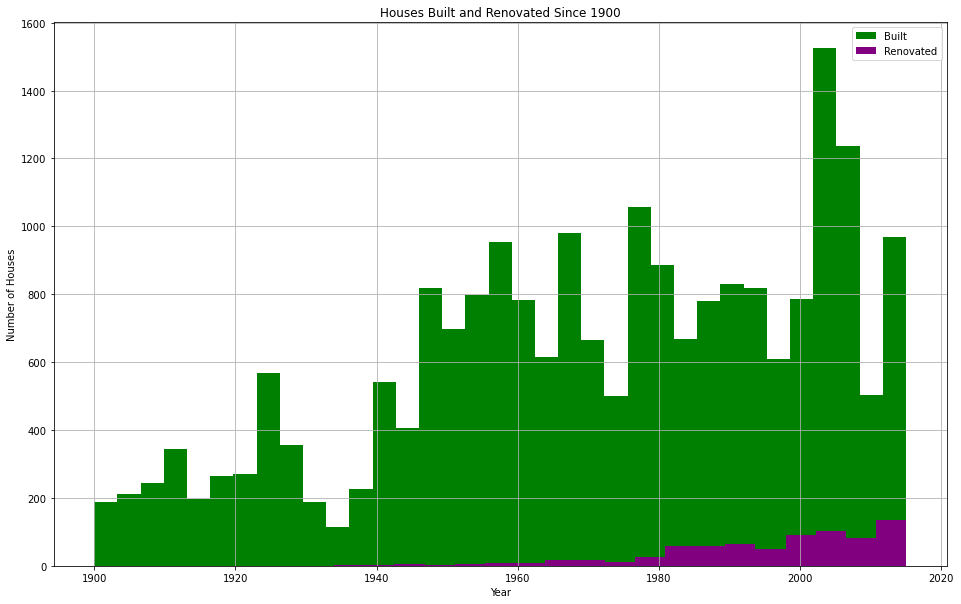

In [10]:
#Plotting their distributions
house_data['yr_built'].hist(color='green', label='Built', bins='auto', figsize=(16, 10))
renovated.hist(color='purple', label='Renovated', bins='auto')

plt.legend()
plt.title('Houses Built and Renovated Since 1900')
plt.xlabel('Year')
plt.ylabel('Number of Houses')
plt.show()

Wow, with that visual it is easy to see how vastly unrenovated houses outnumber their renovated counterparts in this data.
Are renovated houses worth more however? The question to answer is how much renovations may increase home value after all.

In [11]:
#Finding the mean price of renovated and unrenovated houses
renovated_price = house_data[house_data['yr_renovated'] != 0]['price']
print('Renovated median: $', renovated_price.median())
unrenovated_price = house_data[house_data['yr_renovated'] == 0]['price']
print('Unrenovated median: $', unrenovated_price.median())

"""
Finding how much more the median renovated house is worth than unrenovated
"""
print('The typical renovated house is worth $', renovated_price.median()-unrenovated_price.median(), 
'more by comparison of medians')

Renovated median: $ 607502.0
Unrenovated median: $ 449000.0
The typical renovated house is worth $ 158502.0 more by comparison of medians


>It seems renovated homes are worth considerably more. I made sure to use the medians since the prices of the houses are skewed, and because I assume that wealthier people are more likely to renovate, thus their homes would already be much more expensive. I am interested in what Joe Schmoe can do to increase his home's value however, so the modeling should highlight the money areas of his home that he should renovate.

### Categorical Variables

Some variables will not fit into the regression model due to the fact that categorical variables are not numerical. In order to deal with this, dummying the variables turns the results of the data into new rows that are checked 0 or 1 for whether or not those conditions apply. 

In [12]:
#Seeing which variables are categorical
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

>The categorical variables to be dummied will be waterfront, view, condition, and grade. View, and waterfront are variables that homeowners cannot change, yet are still roles that influence value.

In [13]:
#Dummying condition, dropping first column
dummy1 = pd.get_dummies(house_data['condition'], prefix='condition', drop_first=True)
dummy1.head()

,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,1
4,0,0,0,0


In [14]:
#Dummying grade, dropping first column
dummy2 = pd.get_dummies(house_data['grade'], prefix='grade', drop_first=True)
dummy2.head()

,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0


In [15]:
#Dummying waterfront, dropping first column
dummy3 = pd.get_dummies(house_data['waterfront'], prefix='waterfront', drop_first=True)
dummy3.head()

,waterfront_YES
0,0
1,0
2,0
3,0
4,0


In [16]:
#Dummying view, dropping first column
dummy4 =pd.get_dummies(house_data['view'], prefix='view', drop_first=True, )
dummy4.head()

,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [17]:
#Putting the dummy dataframes together
dummies = pd.concat([dummy1, dummy2, dummy3, dummy4], axis=1)
dummies.head()

,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,waterfront_YES,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [18]:
#Concatenating the dummies to create new dataframe
house_new = pd.concat([dummies, house_data], axis=1)
house_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   condition_Fair       21597 non-null  uint8  
 1   condition_Good       21597 non-null  uint8  
 2   condition_Poor       21597 non-null  uint8  
 3   condition_Very Good  21597 non-null  uint8  
 4   grade_11 Excellent   21597 non-null  uint8  
 5   grade_12 Luxury      21597 non-null  uint8  
 6   grade_13 Mansion     21597 non-null  uint8  
 7   grade_3 Poor         21597 non-null  uint8  
 8   grade_4 Low          21597 non-null  uint8  
 9   grade_5 Fair         21597 non-null  uint8  
 10  grade_6 Low Average  21597 non-null  uint8  
 11  grade_7 Average      21597 non-null  uint8  
 12  grade_8 Good         21597 non-null  uint8  
 13  grade_9 Better       21597 non-null  uint8  
 14  waterfront_YES       21597 non-null  uint8  
 15  view_EXCELLENT       21597 non-null 

In [19]:
#Dropping the old categorical columns
house_new.drop(columns=['grade', 'condition', 'waterfront', 'view'], inplace=True)
house_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   condition_Fair       21597 non-null  uint8  
 1   condition_Good       21597 non-null  uint8  
 2   condition_Poor       21597 non-null  uint8  
 3   condition_Very Good  21597 non-null  uint8  
 4   grade_11 Excellent   21597 non-null  uint8  
 5   grade_12 Luxury      21597 non-null  uint8  
 6   grade_13 Mansion     21597 non-null  uint8  
 7   grade_3 Poor         21597 non-null  uint8  
 8   grade_4 Low          21597 non-null  uint8  
 9   grade_5 Fair         21597 non-null  uint8  
 10  grade_6 Low Average  21597 non-null  uint8  
 11  grade_7 Average      21597 non-null  uint8  
 12  grade_8 Good         21597 non-null  uint8  
 13  grade_9 Better       21597 non-null  uint8  
 14  waterfront_YES       21597 non-null  uint8  
 15  view_EXCELLENT       21597 non-null 

In [20]:
#Cleaning any spaces
house_new.columns = house_new.columns.str.replace(' ', '_')

# Modeling

After dummying some variables, I will create a baseline model. The baseline model summary can generate a lot of questions such as which variables are more influential to the model, or which variables are statistically insignificant. The goal of this predictive model is to obtain an R-squared value that explains how well the model accounts for variance. To do that, there must be a linear relationship between the variables and the outcome. Collinearity will also be inspected since some variables may influence others.

>Since price is the variable that is trying to be estimated, it will be considered the outcome. This will be an interative process to find the model that best fits the data.

I will first construct a baseline model using two features that have a large correlation with price.

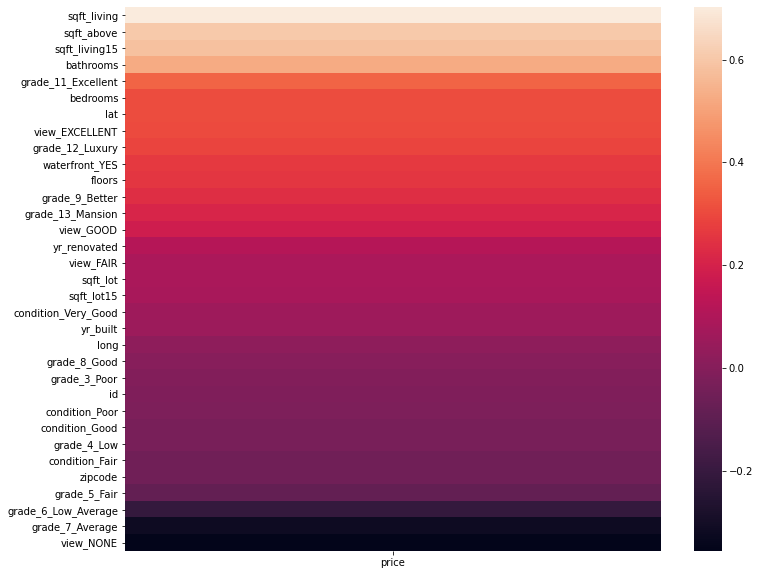

In [21]:
#Creating a dataframe sorted by correlation to price
corr = pd.DataFrame(house_new.corr().price).drop('price').sort_values(by='price', ascending=False)

#Plotting heatmap
fig, ax  = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(corr)

According to the heatmap, sqft_living and sqft_above seem to have the biggest impact on price, so the baseline model will consist of those two.

In [22]:
#Variable to be estimated
outcome = 'price'

#Baseline variables to be tested
x_cols = ['sqft_living', 'sqft_above']

In [23]:
#Constructing model formula
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=house_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.050e+04
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:55:50   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.127e+04   4455.441     -9.262      0.000      -5e+04   -3.25e+04
sqft_living   295.7265      4.026     73.448      0.000     287.835     303.618
sqft_above    -18.8097      4.466     -4.212      0.000     -27.563     -10.056
==============================================================================
Omnibus:                    14762.837   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539868.557
Skew:                           2.809   Prob(JB):                         0.00
Kurtosis:                      26.841   Cond. No.                     7.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

"""
Checking multicollinearity, it would make sense that these influence each other 
since having more space in all but the basement would make the house bigger.
"""
X = house_new[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 23.938311020297917), ('sqft_above', 23.938311020297917)]

* The R squared is 0.493
* Neither variables have P values over alpha value 0.05
* Note [2] suggests large multicollinearity

>I will now construct a model dropping sqft_above but including all other features
 

In [25]:
x_cols = house_new.drop(columns= ['price', 'sqft_above'], axis=1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=house_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     1833.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:55:50   Log-Likelihood:            -2.9321e+05
No. Observations:               21597   AIC:                         5.865e+05
Df Residuals:                   21564   BIC:                         5.867e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            9.853e+06   2.77e+06      3.556      0.000    4.42e+06    1.53e+07
condition_Fair      -8119.5386   1.49e+04     -0.545      0.586   -3.73e+04    2.11e+04
condition_Good       2.948e+04   3305.218      8.919      0.000     2.3e+04     3.6e+04
condition_Poor      -6.708e+04   3.58e+04     -1.876      0.061   -1.37e+05    3013.448
condition_Very_Good  7.118e+04   5264.740     13.520      0.000    6.09e+04    8.15e+04
grade_11_Excellent   2.454e+05   1.13e+04     21.663      0.000    2.23e+05    2.68e+05
grade_12_Luxury      7.023e+05   2.16e+04     32.461      0.000     6.6e+05    7.45e+05
grade_13_Mansion     1.899e+06   5.42e+04     35.033      0.000    1.79e+06       2e+06
grade_3_Poor        -2.295e+05   1.91e+05     -1.201      0.230   -6.04e+05    1.45e+05
grade_4_Low         -3.975e+05    3.8e+04    -10.458      0.000   -4.72e+05   -3.23e+05
grade_5_Fair        -4.086e+05   1.54e+04    -26.451      0.000   -4.39e+05   -3.78e+05
grade_6_Low_Average -3.823e+05   9757.728    -39.182      0.000   -4.01e+05   -3.63e+05
grade_7_Average     -3.431e+05   7993.986    -42.916      0.000   -3.59e+05   -3.27e+05
grade_8_Good        -2.827e+05   7163.194    -39.460      0.000   -2.97e+05   -2.69e+05
grade_9_Better      -1.621e+05   7004.698    -23.142      0.000   -1.76e+05   -1.48e+05
waterfront_YES       5.518e+05   1.93e+04     28.524      0.000    5.14e+05     5.9e+05
view_EXCELLENT       1.875e+05   1.45e+04     12.962      0.000    1.59e+05    2.16e+05
view_FAIR            4.736e+04   1.22e+04      3.883      0.000    2.34e+04    7.13e+04
view_GOOD             6.53e+04   1.05e+04      6.213      0.000    4.47e+04    8.59e+04
view_NONE           -7.178e+04   6507.346    -11.030      0.000   -8.45e+04    -5.9e+04
id                  -6.294e-07   4.58e-07     -1.375      0.169   -1.53e-06    2.68e-07
bedrooms            -2.023e+04   1839.086    -11.001      0.000   -2.38e+04   -1.66e+04
bathrooms            4.329e+04   3080.416     14.052      0.000    3.72e+04    4.93e+04
sqft_living           132.2647      3.268     40.478      0.000     125.860     138.669
sqft_lot                0.1273      0.045      2.798      0.005       0.038       0.216
floors               2.691e+04   3104.621      8.669      0.000    2.08e+04     3.3e+04
yr_built            -2184.7686     69.765    -31.316      0.000   -2321.513   -2048.024
yr_renovated           33.8803      3.787      8.945      0.000      26.457      41.304
zipcode              -604.0348     31.442    -19.211      0.000    -665.663    -542.407
lat                   6.15e+05   1.01e+04     60.625      0.000    5.95e+05    6.35e+05
long                -2.039e+05   1.23e+04    -16.523      0.000   -2.28e+05    -1.8e+05
sqft_living15          27.1516      3.271      8.300      0.000      20.740      33.563
sqf

* There is a large spread bewteen variables
* 
<p> I will normalize the variables now in order to reduce the spread of the coefficients. This should assist interpretation and further address that [2] note
    <p/>

In [26]:
#Normalizing variables by taking Z-scores
for col in x_cols:
    house_new[col] = ((house_new[col] - house_new[col].mean())/ house_new[col].std())

In [27]:
model = ols(formula=formula, data=house_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     1833.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:55:51   Log-Likelihood:            -2.9321e+05
No. Observations:               21597   AIC:                         5.865e+05
Df Residuals:                   21564   BIC:                         5.867e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.403e+05   1297.146    416.527      0.000    5.38e+05    5.43e+05
condition_Fair       -717.5399   1316.155     -0.545      0.586   -3297.300    1862.220
condition_Good       1.298e+04   1454.949      8.919      0.000    1.01e+04    1.58e+04
condition_Poor      -2456.3837   1309.509     -1.876      0.061   -5023.118     110.350
condition_Very_Good  1.917e+04   1418.171     13.520      0.000    1.64e+04     2.2e+04
grade_11_Excellent   3.305e+04   1525.609     21.663      0.000    3.01e+04     3.6e+04
grade_12_Luxury      4.499e+04   1386.058     32.461      0.000    4.23e+04    4.77e+04
grade_13_Mansion     4.657e+04   1329.243     35.033      0.000     4.4e+04    4.92e+04
grade_3_Poor        -1561.4261   1299.969     -1.201      0.230   -4109.462     986.610
grade_4_Low         -1.405e+04   1343.186    -10.458      0.000   -1.67e+04   -1.14e+04
grade_5_Fair        -4.301e+04   1625.859    -26.451      0.000   -4.62e+04   -3.98e+04
grade_6_Low_Average -1.118e+05   2852.599    -39.182      0.000   -1.17e+05   -1.06e+05
grade_7_Average     -1.691e+05   3939.620    -42.916      0.000   -1.77e+05   -1.61e+05
grade_8_Good         -1.27e+05   3219.234    -39.460      0.000   -1.33e+05   -1.21e+05
grade_9_Better      -5.288e+04   2285.140    -23.142      0.000   -5.74e+04   -4.84e+04
waterfront_YES       4.522e+04   1585.291     28.524      0.000    4.21e+04    4.83e+04
view_EXCELLENT       2.255e+04   1739.883     12.962      0.000    1.91e+04     2.6e+04
view_FAIR            5808.9031   1496.064      3.883      0.000    2876.508    8741.298
view_GOOD            9897.3737   1592.906      6.213      0.000    6775.161     1.3e+04
view_NONE           -2.132e+04   1932.937    -11.030      0.000   -2.51e+04   -1.75e+04
id                  -1810.8055   1317.008     -1.375      0.169   -4392.238     770.627
bedrooms            -1.874e+04   1703.542    -11.001      0.000   -2.21e+04   -1.54e+04
bathrooms            3.329e+04   2368.791     14.052      0.000    2.86e+04    3.79e+04
sqft_living          1.214e+05   2999.949     40.478      0.000    1.16e+05    1.27e+05
sqft_lot             5271.0089   1884.073      2.798      0.005    1578.086    8963.932
floors               1.452e+04   1675.510      8.669      0.000    1.12e+04    1.78e+04
yr_built            -6.418e+04   2049.364    -31.316      0.000   -6.82e+04   -6.02e+04
yr_renovated         1.233e+04   1378.769      8.945      0.000    9631.196     1.5e+04
zipcode             -3.232e+04   1682.537    -19.211      0.000   -3.56e+04    -2.9e+04
lat                   8.52e+04   1405.424     60.625      0.000    8.24e+04     8.8e+04
long                -2.869e+04   1736.386    -16.523      0.000   -3.21e+04   -2.53e+04
sqft_living15        1.861e+04   2241.516      8.300      0.000    1.42e+04     2.3e+04
sqf

* There is still a great amount of variance in the variable coeffients
* There does not seem to be any numerical problem anymore
>Checking the linearity of the model should guage how well it fits the data

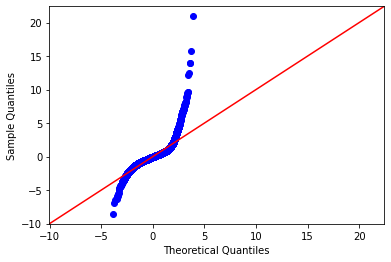

In [28]:
#Compares linearity over quantiles
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

The model does a poor job in maintaining linearity, especially on both tail ends. I will see if the target variable is skewed. If it is, I should apply a transformation to make it more normal so that it alligns with the assumptions for linear regression modeling. That should also improve the model.

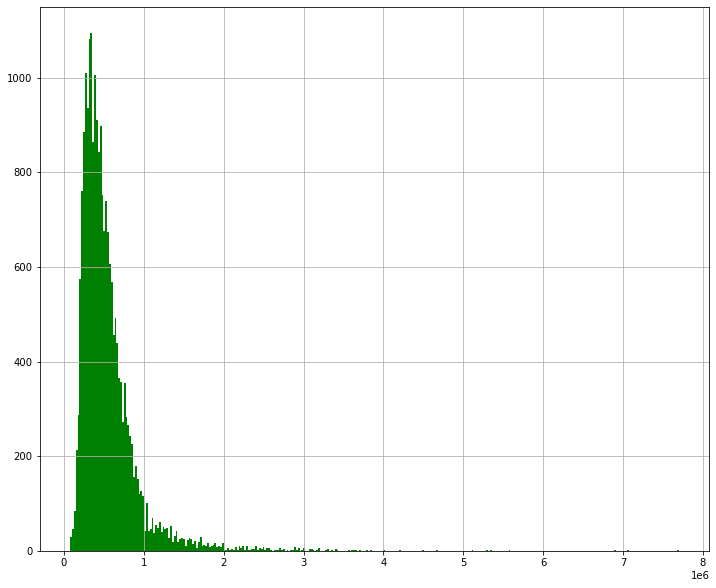

In [29]:
#Observing price distribution 
house_data.price.hist(bins='auto', color='green', figsize=(12,10))
plt.show()

* The price skews right meaning there is a minority of very expensive houses that influence the center ofthe data.

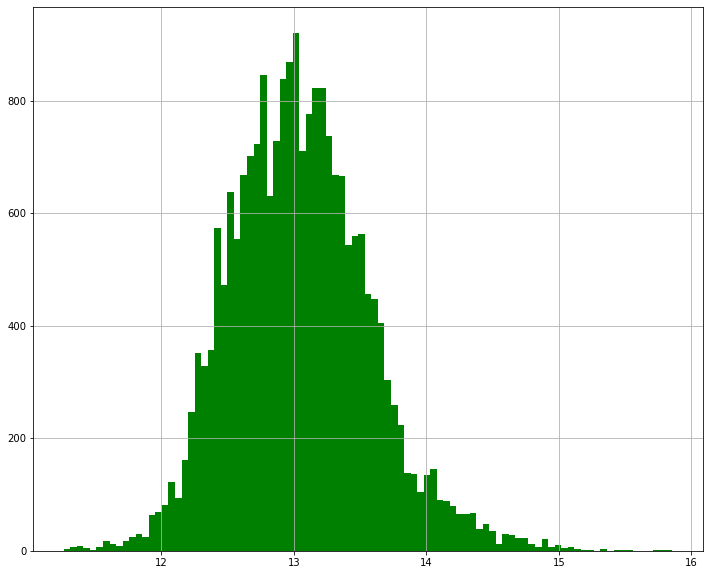

In [30]:
#Applying log tranformation
house_new.price = house_new.price.map(np.log)

#Observing the new price distribution
house_new.price.hist(bins='auto', color='green', figsize=(12,10))
plt.show()

In [31]:
#Modeling with logged price
model = ols(formula=formula, data=house_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     2297.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:55:52   Log-Likelihood:                -772.37
No. Observations:               21597   AIC:                             1611.
Df Residuals:                   21564   BIC:                             1874.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.0482      0.002   7640.489      0.000      13.045      13.052
condition_Fair         -0.0109      0.002     -6.275      0.000      -0.014      -0.007
condition_Good          0.0232      0.002     12.129      0.000       0.019       0.027
condition_Poor         -0.0076      0.002     -4.383      0.000      -0.011      -0.004
condition_Very_Good     0.0320      0.002     17.155      0.000       0.028       0.036
grade_11_Excellent      0.0098      0.002      4.881      0.000       0.006       0.014
grade_12_Luxury         0.0097      0.002      5.290      0.000       0.006       0.013
grade_13_Mansion        0.0055      0.002      3.120      0.002       0.002       0.009
grade_3_Poor           -0.0021      0.002     -1.246      0.213      -0.005       0.001
grade_4_Low            -0.0320      0.002    -18.090      0.000      -0.035      -0.029
grade_5_Fair           -0.0855      0.002    -39.944      0.000      -0.090      -0.081
grade_6_Low_Average    -0.1887      0.004    -50.250      0.000      -0.196      -0.181
grade_7_Average        -0.2250      0.005    -43.375      0.000      -0.235      -0.215
grade_8_Good           -0.1296      0.004    -30.589      0.000      -0.138      -0.121
grade_9_Better         -0.0375      0.003    -12.451      0.000      -0.043      -0.032
waterfront_YES          0.0320      0.002     15.326      0.000       0.028       0.036
view_EXCELLENT          0.0162      0.002      7.065      0.000       0.012       0.021
view_FAIR               0.0061      0.002      3.098      0.002       0.002       0.010
view_GOOD               0.0080      0.002      3.837      0.000       0.004       0.012
view_NONE              -0.0368      0.003    -14.452      0.000      -0.042      -0.032
id                      0.0014      0.002      0.807      0.420      -0.002       0.005
bedrooms               -0.0161      0.002     -7.178      0.000      -0.020      -0.012
bathrooms               0.0534      0.003     17.134      0.000       0.047       0.060
sqft_living             0.1399      0.004     35.420      0.000       0.132       0.148
sqft_lot                0.0202      0.002      8.160      0.000       0.015       0.025
floors                  0.0361      0.002     16.369      0.000       0.032       0.040
yr_built               -0.1076      0.003    -39.895      0.000      -0.113      -0.102
yr_renovated            0.0121      0.002      6.671      0.000       0.009       0.016
zipcode                -0.0351      0.002    -15.863      0.000      -0.039      -0.031
lat                     0.1927      0.002    104.170      0.000       0.189       0.196
long                   -0.0228      0.002     -9.991      0.000      -0.027      -0.018
sqft_living15           0.0641      0.003     21.723      0.000       0.058       0.070
sqf

* The variance in the coefficients has gone down considerably. 
> I will check the linearity of the model

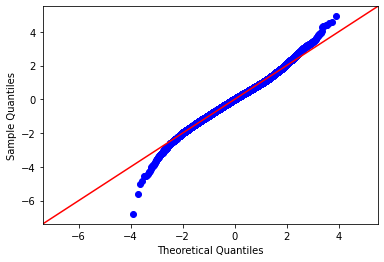

In [32]:
#Compares linearity over quantiles
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

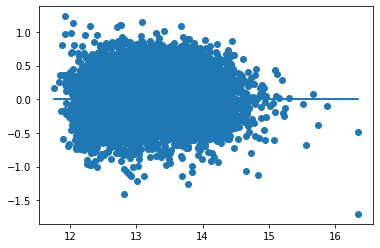

In [33]:
#Checking homoscedasticity
plt.scatter(model.predict(house_new), model.resid)
plt.plot(model.predict(house_new), [0 for i in range(len(house_new))])
plt.show()

* Appears to be a better fit for linearity
* The model passes homoscedasticity
> I will create one last model removed of any remaining statistically insignifcant variables

In [34]:
x_cols = x_cols.drop(columns=['grade_3_Poor', 'id'], axis=1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=house_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     2450.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:55:53   Log-Likelihood:                -773.48
No. Observations:               21597   AIC:                             1609.
Df Residuals:                   21566   BIC:                             1856.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.0482      0.002   7640.451      0.000      13.045      13.052
condition_Fair         -0.0109      0.002     -6.278      0.000      -0.014      -0.007
condition_Good          0.0232      0.002     12.118      0.000       0.019       0.027
condition_Poor         -0.0075      0.002     -4.379      0.000      -0.011      -0.004
condition_Very_Good     0.0320      0.002     17.124      0.000       0.028       0.036
grade_11_Excellent      0.0098      0.002      4.886      0.000       0.006       0.014
grade_12_Luxury         0.0096      0.002      5.285      0.000       0.006       0.013
grade_13_Mansion        0.0055      0.002      3.115      0.002       0.002       0.009
grade_4_Low            -0.0320      0.002    -18.078      0.000      -0.035      -0.028
grade_5_Fair           -0.0854      0.002    -39.950      0.000      -0.090      -0.081
grade_6_Low_Average    -0.1885      0.004    -50.255      0.000      -0.196      -0.181
grade_7_Average        -0.2247      0.005    -43.367      0.000      -0.235      -0.215
grade_8_Good           -0.1294      0.004    -30.555      0.000      -0.138      -0.121
grade_9_Better         -0.0373      0.003    -12.408      0.000      -0.043      -0.031
waterfront_YES          0.0320      0.002     15.317      0.000       0.028       0.036
view_EXCELLENT          0.0162      0.002      7.081      0.000       0.012       0.021
view_FAIR               0.0061      0.002      3.089      0.002       0.002       0.010
view_GOOD               0.0080      0.002      3.828      0.000       0.004       0.012
view_NONE              -0.0368      0.003    -14.479      0.000      -0.042      -0.032
bedrooms               -0.0161      0.002     -7.173      0.000      -0.020      -0.012
bathrooms               0.0534      0.003     17.135      0.000       0.047       0.060
sqft_living             0.1400      0.004     35.449      0.000       0.132       0.148
sqft_lot                0.0201      0.002      8.133      0.000       0.015       0.025
floors                  0.0361      0.002     16.371      0.000       0.032       0.040
yr_built               -0.1076      0.003    -39.894      0.000      -0.113      -0.102
yr_renovated            0.0121      0.002      6.665      0.000       0.009       0.016
zipcode                -0.0351      0.002    -15.861      0.000      -0.039      -0.031
lat                     0.1928      0.002    104.228      0.000       0.189       0.196
long                   -0.0228      0.002     -9.987      0.000      -0.027      -0.018
sqft_living15           0.0641      0.003     21.738      0.000       0.058       0.070
sqft_lot15             -0.0072      0.002     -2.899      0.004      -0.012      -0.002
==============================================================================
Omnibus:    

# Interpretation

The main business objective of the project is to help Zillow recommend renovations to DIY homeowners to increase their home value. This includes a metric that describes how much the value of the home should increase. In the model that means looking at the coefficient associated with certain variables to find particular parts of the house that strongly influence home value.

* Observe the model summary

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     2450.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:55:53   Log-Likelihood:                -773.48
No. Observations:               21597   AIC:                             1609.
Df Residuals:                   21566   BIC:                             1856.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.0482      0.002   7640.451      0.000      13.045      13.052
condition_Fair         -0.0109      0.002     -6.278      0.000      -0.014      -0.007
condition_Good          0.0232      0.002     12.118      0.000       0.019       0.027
condition_Poor         -0.0075      0.002     -4.379      0.000      -0.011      -0.004
condition_Very_Good     0.0320      0.002     17.124      0.000       0.028       0.036
grade_11_Excellent      0.0098      0.002      4.886      0.000       0.006       0.014
grade_12_Luxury         0.0096      0.002      5.285      0.000       0.006       0.013
grade_13_Mansion        0.0055      0.002      3.115      0.002       0.002       0.009
grade_4_Low            -0.0320      0.002    -18.078      0.000      -0.035      -0.028
grade_5_Fair           -0.0854      0.002    -39.950      0.000      -0.090      -0.081
grade_6_Low_Average    -0.1885      0.004    -50.255      0.000      -0.196      -0.181
grade_7_Average        -0.2247      0.005    -43.367      0.000      -0.235      -0.215
grade_8_Good           -0.1294      0.004    -30.555      0.000      -0.138      -0.121
grade_9_Better         -0.0373      0.003    -12.408      0.000      -0.043      -0.031
waterfront_YES          0.0320      0.002     15.317      0.000       0.028       0.036
view_EXCELLENT          0.0162      0.002      7.081      0.000       0.012       0.021
view_FAIR               0.0061      0.002      3.089      0.002       0.002       0.010
view_GOOD               0.0080      0.002      3.828      0.000       0.004       0.012
view_NONE              -0.0368      0.003    -14.479      0.000      -0.042      -0.032
bedrooms               -0.0161      0.002     -7.173      0.000      -0.020      -0.012
bathrooms               0.0534      0.003     17.135      0.000       0.047       0.060
sqft_living             0.1400      0.004     35.449      0.000       0.132       0.148
sqft_lot                0.0201      0.002      8.133      0.000       0.015       0.025
floors                  0.0361      0.002     16.371      0.000       0.032       0.040
yr_built               -0.1076      0.003    -39.894      0.000      -0.113      -0.102
yr_renovated            0.0121      0.002      6.665      0.000       0.009       0.016
zipcode                -0.0351      0.002    -15.861      0.000      -0.039      -0.031
lat                     0.1928      0.002    104.228      0.000       0.189       0.196
long                   -0.0228      0.002     -9.987      0.000      -0.027      -0.018
sqft_living15           0.0641      0.003     21.738      0.000       0.058       0.070
sqft_lot15             -0.0072      0.002     -2.899      0.004      -0.012      -0.002
==============================================================================
Omnibus:    

### Condition

Looking at variables that a homeowner could change, there appears to be potential in improving home value when observing the condition of the house. Related to maintenence of a house, the condition refers to levels of pleasentness that the house can be. For instance, if a house were in poor condition, then it would automatically be worth .0075 logs less than the average house. As the condition improves however, the price increases. Take a house in the best condition, very good, due to its condition it is worth .0320 logs more than the average house. That total swing in price is .0395 logs, or in plain language, a 4% increase in value. 

* Enacting this change would mean to to address the components giving the house a poor grade. By standards from the King County, that includes the house being worn out, needing repair and overhaul on painted surfaces, and needing fixed in areas of roofing, plumbing, and heating.
* A house in very good condition on the other hand, has items well maintained, with many overhauled and repaired if they have shown signs of wear. It is practically new in most ways.



A shift in the houses condition from fair to just good would net a change of .0341 logs in price, or about 3.5%

*  To do this, fix the problems giving the house a fair grading. That is the house being badly worn, having many items needing refinishing or overhauling, with deferred maintenance obvious, and inadequate building utility and systems all shortening the life expectancy, increasing the effective age.

* A house in good conditition has practically nothing immediately wrong with it, and will last longer than the typical house.

While it may seem obvious, the model was helpful in determining how much of a change that going from a poor or fair kept house to a good or very good kept house would make. The changes also address the bones of the household, so it may be more subjective to each house, but the overall advice in this case is to update the foundations of a home.

### Square Footage

The bigger the better. According to the model, for every percentile increase of the average house's usable square footage, the home's value should increase by .1400 logs, or 15%. If a house were in the 50th percentile, bigger than 50% of houses, then expanded to be bigger than 52% of houses, it would become 30% more valuable. 


The model found that size has an influential role in determining home value. While making large scale additions to the house would be costly in itself, it seems that it would pay off when it comes time to sell the house. Better yet, make the addition to the house a new bedroom or expand on rooms of the house that are already its strong points.  

# Business Implications


<p>Thanks to this project, Zillow can now recommend useful renovations for homeowners who want to increase the values of their homes.<p/>
<p>
I would recommend adapting these findings into user friendly tools that are able to calculate a home's potential for value generation. A person could simply enter the parameters of their home and find out areas of improvement, such as if they are willing to update their home's features to improve its condition. The system, since it works with percentages, would take in their appraised home value then apply theoretical renovations that the homeowner chooses, the model would then provide a predictive home value. 
    <p/>
<p>
    For example, if a homeowner entered their home value as 460,652 dollars with all aspects assumed average except for condition, then applied a what-if the home was in very good shape while keeping all other factors constant, the tool would tell them their house could be worth 475,774 dollars. The tool would estimate an expected 15,122 dollar potential increase.